# Decision Tree (Classification)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv(r'D:\Project Data Set\Social_Network_Ads\New_Social_Network_Ads.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


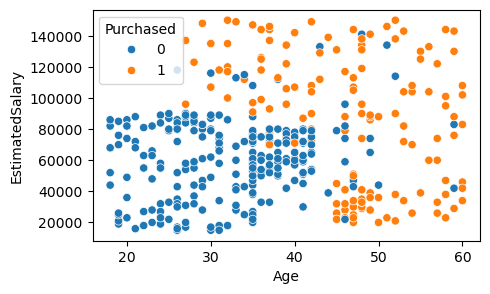

In [28]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age',y='EstimatedSalary', data= dataset, hue= 'Purchased')
plt.show()

In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = dataset.iloc[:,:-1]
y = dataset['Purchased']

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x)
x =pd.DataFrame(sc.transform(x), columns=x.columns)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Installing Decision Tree


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(x_train,y_train)

In [22]:
dt.score(x_test,y_test)

0.8375

In [33]:
dt.score(x_train,y_train)

0.996875

### The model is OVERFITTED
training data high score but test data low score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


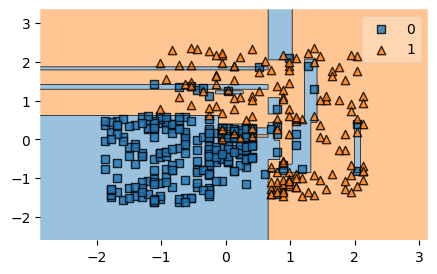

In [37]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=dt)
plt.show()

#### Using Non-linear algo in linear data structure doesn't yield perfect reesult
So, Use non_linear algo

## Pre-Prunning 

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # max_depth - decides the length of the Decision-Tree
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### This time no noticable change but sometimes adding criterion='entropy' changes  accuracy score.

## After Pre-Prunning accuracy improved & Overfitting reduced.

In [46]:
dt1.score(x_test,y_test)

0.9125

In [47]:
dt1.score(x_train,y_train)

0.91875

In [13]:
dt.predict([[19, 19000]])     # 19	19000	0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### Not proper accuracy.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


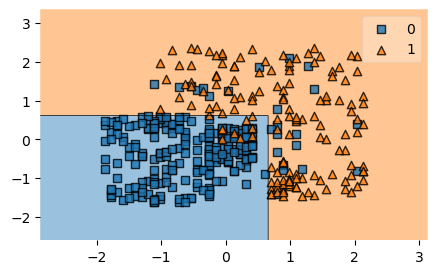

In [48]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=dt1)
plt.show()

### Plotting the prediction

In [15]:
from sklearn.tree import plot_tree

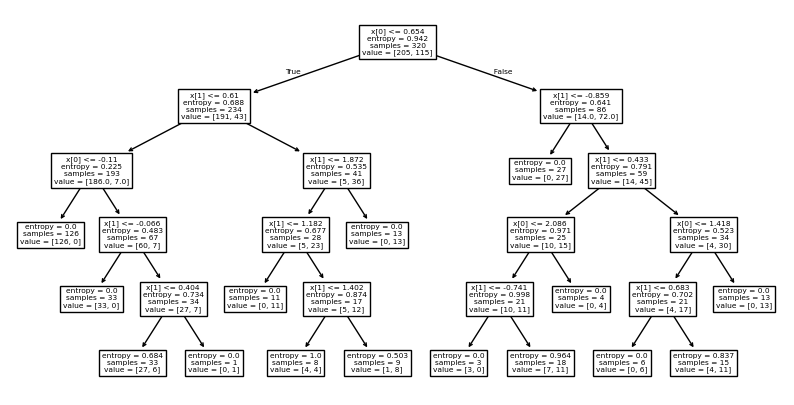

In [41]:
plt.figure(figsize=(10,5))
plot_tree(dt1)
plt.savefig('demo.jpg')
plt.show()

## Post-prunning

In [44]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i) 
    dt2.fit(x_train, y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

# So from the below data:
# 2,3 no Prediction is the most Well-Fitting 

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19
